In [2]:
import pandas as pd

In [3]:
import matplotlib.pylab as plt 

In [4]:
air=pd.read_csv("C:/Users/elcot/Documents/EastWestAirlines (2).csv")

In [5]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
from sklearn.preprocessing import normalize

In [7]:
data_scaled = normalize(air)

In [8]:
data_scaled = pd.DataFrame(data_scaled, columns=air.columns)

In [9]:
data_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [10]:
import scipy.cluster.hierarchy as shc

In [11]:
plt.figure(figsize=(10, 7))  

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Dendrograms')

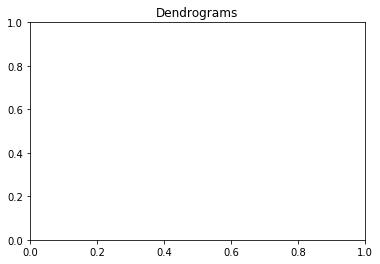

In [12]:
plt.title("Dendrograms")  

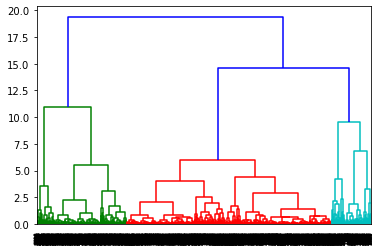

In [13]:
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
h_complet = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

In [16]:
h_complet.fit_predict(data_scaled)

array([2, 1, 2, ..., 0, 2, 1], dtype=int64)

In [17]:
cluster_labels=pd.Series(h_complet.labels_)

In [18]:
air['clust']=cluster_labels

In [19]:
air.iloc[:,2:].groupby(air.clust).median()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,
0,0.0,4.0,1.0,1.0,33818.5,16.0,0.0,0.0,4300.0,1.0,0.0
1,0.0,1.0,1.0,1.0,454.0,1.0,0.0,0.0,4509.0,0.0,1.0
2,0.0,1.0,1.0,1.0,4673.0,10.0,0.0,0.0,3887.0,0.0,2.0


In [20]:
from sklearn.cluster import KMeans

In [21]:
from scipy.spatial.distance import cdist 

In [22]:
import numpy as np

In [23]:
X = np.random.uniform(0,1,1000)

In [24]:
Y = np.random.uniform(0,1,1000)

In [25]:
df_xy =pd.DataFrame(columns=["X","Y"])

In [26]:
df_xy.X = X

In [27]:
df_xy.Y = Y

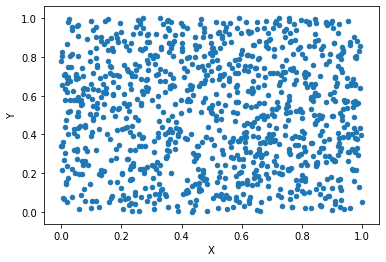

In [28]:
df_xy.plot(x="X",y = "Y",kind="scatter")

In [29]:
model1 = KMeans(n_clusters=5).fit(df_xy)

In [30]:
model1.labels_

array([1, 0, 2, 3, 1, 1, 4, 1, 1, 1, 4, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       4, 1, 3, 4, 1, 2, 0, 1, 0, 1, 3, 4, 3, 1, 4, 1, 4, 3, 1, 0, 4, 2,
       1, 4, 4, 2, 3, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 1, 1, 0, 3, 1, 3, 0,
       3, 0, 4, 1, 3, 3, 0, 0, 3, 3, 1, 1, 4, 1, 3, 3, 2, 2, 3, 3, 4, 1,
       1, 0, 2, 3, 3, 3, 2, 2, 3, 1, 2, 4, 0, 3, 2, 4, 3, 3, 3, 3, 1, 3,
       2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 1, 0, 2, 4, 0, 4, 0, 2, 2, 1, 1, 3,
       3, 3, 0, 0, 1, 0, 2, 1, 3, 4, 4, 3, 0, 0, 2, 4, 1, 2, 3, 0, 0, 1,
       4, 4, 4, 2, 3, 1, 3, 2, 1, 1, 4, 4, 2, 1, 4, 4, 1, 1, 2, 1, 1, 0,
       1, 3, 3, 0, 2, 3, 3, 1, 0, 3, 1, 3, 1, 4, 0, 1, 1, 0, 3, 1, 4, 4,
       3, 1, 3, 4, 0, 1, 3, 2, 0, 0, 4, 1, 3, 3, 2, 3, 3, 1, 4, 4, 0, 4,
       2, 3, 2, 3, 4, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 3, 3, 0,
       3, 3, 3, 4, 1, 4, 0, 0, 3, 1, 2, 3, 1, 3, 1, 1, 3, 4, 4, 4, 3, 2,
       1, 1, 1, 3, 2, 3, 4, 1, 3, 4, 2, 4, 1, 3, 2, 3, 3, 1, 0, 3, 4, 3,
       4, 3, 2, 0, 0, 0, 0, 1, 0, 4, 2, 3, 1, 1, 4,

In [31]:
model1.cluster_centers_

array([[0.15523482, 0.71765342],
       [0.74650251, 0.25427885],
       [0.49797109, 0.75811476],
       [0.2616555 , 0.23489365],
       [0.83408904, 0.73709345]])

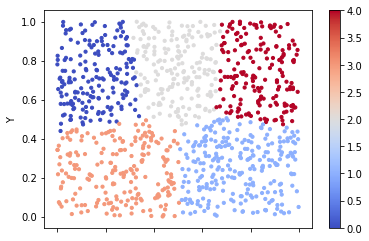

In [32]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [33]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [34]:
df_norm = norm_func(air.iloc[:,1:])

In [35]:
df_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.5
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.5
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,0.5
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,1.0


In [36]:
k = list(range(2,15))

In [37]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [38]:
TWSS = [] 

In [39]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2101165a6d8>,
 <a list of 13 Text xticklabel objects>)

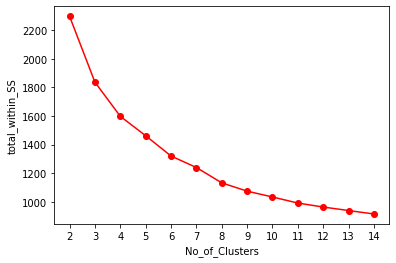

In [40]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [41]:
model=KMeans(n_clusters=5) 

In [42]:
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
md=pd.Series(model.labels_)

In [45]:
air['clust']=md 

In [46]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.5
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.5
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.0


In [47]:
 air = air.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]

In [48]:
df_norm.iloc[:,1:11].groupby(df_norm.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,
0.0,0.009778,0.611549,0.014378,0.010436,0.152392,0.211772,0.018754,0.031575,0.517422,0.660482
0.5,0.000987,0.001053,0.000000,0.000000,0.003337,0.037601,0.002210,0.004171,0.512058,0.157895
1.0,0.016634,0.163328,0.005519,0.000409,0.038492,0.119925,0.015713,0.027646,0.483980,0.283729
